# CSCI E-89 Deep Learning
## LAB 03: Keras MNIST Classifier - 2

In [1]:
# Objective : This Notebook introduces Keras API alternate way to code
# Build a sequential model 

# Build a sequential model 
# Compile the model
# Train the model
# Evaluate the model 

# Variations :
# a. Model creation
# b. Loss definition 
# c. Reshaping and flattening

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
tf.config.run_functions_eagerly(True)

np.random.seed(1337) # Reproducibility

In [2]:
print (tf.__version__)
print (tf.keras.__version__)

2.20.0
3.11.3


## Load MNIST Data 
#### http://yann.lecun.com/exdb/mnist/

#The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. 
#The digits have been size-normalized and centered in a fixed-size image.

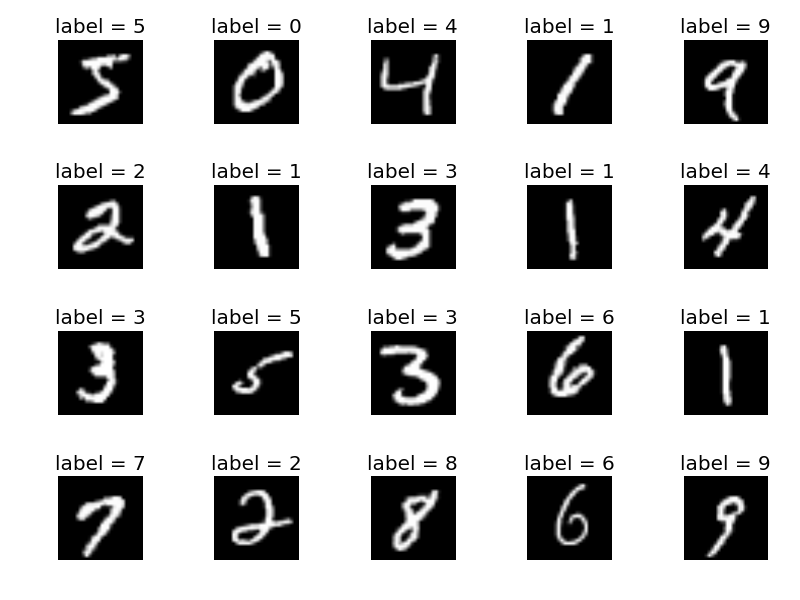

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0         #Convert the samples from integers to floating-point numbers

In [4]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [5]:
# How does our Data look ? These are images converted to binary pixel values in a 28 x 28 form for number "5" 

x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
y_train[0]

np.uint8(5)

## Build the model 

In [7]:
#Another way to build the Sequential Model 

from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense

model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
model.add(layers.Dense(32, activation='relu')),
model.add(layers.Flatten()),
model.add(layers.Dense(10, activation='softmax'))

/Users/umarala/anaconda3/envs/dl2025/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Note that the output for each observation is 10 dimensional while each label is a single number. 
#Here we'll manually one-hot encode the labels instead.

from tensorflow.keras.utils import to_categorical as one_hot

y_train_hot = one_hot(y_train)
y_test_hot  = one_hot(y_test)

In [10]:
y_test[1]

np.uint8(2)

## Compilation

Before training a model, you need to configure the learning process, which is done via the `compile` method. It receives three arguments:

- an optimizer. This could be the string identifier of an existing optimizer (such as `rmsprop` or `adagrad`), or an instance of the `Optimizer` class. 
- a loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function. 
- a list of metrics. For any classification problem you will want to set this to `metrics=['accuracy']`. 

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy() ,metrics=['accuracy'])

In [12]:
# And we will FAIL Now !!

history = model.fit(x_train, y_train_hot,epochs=5,batch_size=128)

Epoch 1/5


/Users/umarala/anaconda3/envs/dl2025/lib/python3.13/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]. Expected shape (None, 784), but input has incompatible shape (128, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(128, 28, 28), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

Why did it fail ? 
The issue here is that we used an input shape like this input_shape=(784,) — with the second dimension being unspecified — but what got passed in were the inputs that are of the shape (60000, 28, 28). We have to preprocess the data by reshaping it into the shape the network expects. 

So Lets implement the fix but first lets look at the dimensions 

In [13]:
print(x_train.ndim)      # 3
print(x_train[0].ndim)   # 2
print(x_train.shape)     # (60000, 28, 28)
print(x_train[0].shape)  # (28, 28)
 
print(y_test.ndim)       # 1
print(y_test[0].ndim)    # 0
print(y_test.shape)      # (10000,)
print(y_test[0].shape)   # ()

3
2
(60000, 28, 28)
(28, 28)
1
0
(10000,)
()


In [14]:
#Option1
x_train = x_train.reshape((60000, 28 * 28))

In [15]:
history = model.fit(x_train, y_train_hot,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9257 - loss: 0.2532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9685 - loss: 0.1051
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9774 - loss: 0.0736
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9828 - loss: 0.0560
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9854 - loss: 0.0462


In [17]:
# Option2 Add flatten right before softmax 
#model.add(layers.Flatten()),

## Evaluate the model 

In [19]:
x_test = x_test.reshape((10000, 28 * 28))

In [20]:

model.evaluate(x_test,  y_test_hot, verbose=2)

313/313 - 2s - 5ms/step - accuracy: 0.9720 - loss: 0.0957


[0.0957038477063179, 0.972000002861023]

In [21]:
model.metrics_names

['loss', 'compile_metrics']